# Fashion_MNIST -CNN v2
- 2 x conv2d layers with padding
- 1 MaxPooling 2D layer
- 1 Dropout(0.25) layer
- 1 FCN layers
- 1 Dropout(0.5) layer
- 1 output layers

- 데이터 전처리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test,y_test) = fashion_mnist.load_data()
X_train.shape, y_train.shape,X_test.shape,y_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [5]:
#X_train, X_test 정규화 (0~1)
#이미지 차원 변경:CNN=2차원을 3차원으로 올려야.

X_train = X_train.reshape(-1,28,28,1) / 255.
X_test = X_test.reshape(-1,28,28,1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [6]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test=to_categorical(y_test)
Y_train.shape,Y_test.shape


((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [7]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D,Flatten, MaxPooling2D, Dropout
#flatten - 3차원인 conv2D를 1차원인 dense, fully connected layer로 
#넣어야 하기 때문에 차원 축소를 할 때 필요.
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [8]:
model =Sequential([
                   Conv2D(32, kernel_size=(3,3),padding='same', input_shape=(28,28,1),activation='relu'),
                   Conv2D(64, (3,3), padding='same',activation='relu'),
                   MaxPooling2D(), #= MaxPooling2D(pool_size=(2,2))
                   Dropout(0.25),
                   Flatten(), #24,24,64에서 1차원 512개의 노드로.
                   Dense(512,activation='relu'),
                   Dropout(0.5),
                   Dense(10,activation='softmax')
])
model.summary()

#18496=32 x 3 x 3 x 64 + 64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 512)               6423040   
                                                        

In [9]:
model.compile('adam','categorical_crossentropy',['accuracy'])

In [10]:
model_path = 'best-fasion-mnist-cnn-v2.h5'
mc=ModelCheckpoint(model_path,save_best_only=True,verbose=1)
es=EarlyStopping(patience=10)

In [11]:
hist=model.fit(X_train,Y_train,validation_split=0.2,
                 epochs=100,batch_size=200,verbose=0,
                 callbacks=[mc,es])


Epoch 1: val_loss improved from inf to 0.31297, saving model to best-fasion-mnist-cnn-v2.h5

Epoch 2: val_loss improved from 0.31297 to 0.26558, saving model to best-fasion-mnist-cnn-v2.h5

Epoch 3: val_loss improved from 0.26558 to 0.23571, saving model to best-fasion-mnist-cnn-v2.h5

Epoch 4: val_loss improved from 0.23571 to 0.21815, saving model to best-fasion-mnist-cnn-v2.h5

Epoch 5: val_loss improved from 0.21815 to 0.20982, saving model to best-fasion-mnist-cnn-v2.h5

Epoch 6: val_loss improved from 0.20982 to 0.20722, saving model to best-fasion-mnist-cnn-v2.h5

Epoch 7: val_loss improved from 0.20722 to 0.20222, saving model to best-fasion-mnist-cnn-v2.h5

Epoch 8: val_loss did not improve from 0.20222

Epoch 9: val_loss did not improve from 0.20222

Epoch 10: val_loss did not improve from 0.20222

Epoch 11: val_loss did not improve from 0.20222

Epoch 12: val_loss did not improve from 0.20222

Epoch 13: val_loss did not improve from 0.20222

Epoch 14: val_loss did not impro

In [12]:
best_model = load_model(model_path)
best_model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2174 - accuracy: 0.9247


[0.21743151545524597, 0.9247000217437744]

Text(0.5, 0, 'Epoch')

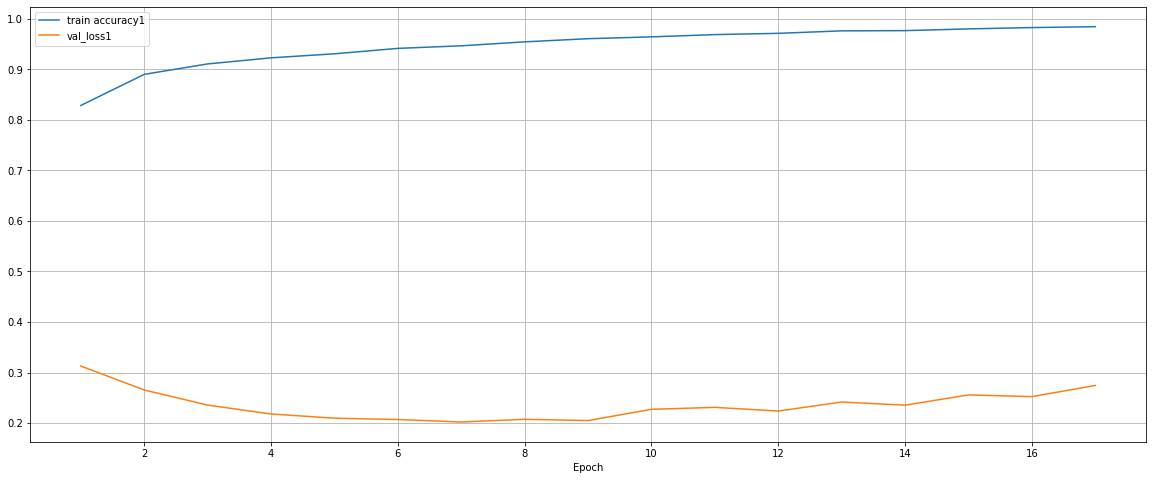

In [13]:
y_acc=hist.history['accuracy']
y_vloss=hist.history['val_loss']
xs=np.arange(1, len(y_acc)+1)
plt.figure(figsize=(20,8))
plt.plot(xs,y_acc,label='train accuracy1')
plt.plot(xs,y_vloss,label='val_loss1')
plt.legend(),
plt.grid(),
plt.xlabel('Epoch')